In [1]:
#import libraries

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as utils
import torch.utils.data as td
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #sklearn package helps in splitting the data for train, validation and test set
from sklearn.model_selection import GridSearchCV
torch.manual_seed(1234)


In [2]:
#import iris data from sklearn
from sklearn.datasets import load_iris #import sklearn iris dataset
iris = load_iris()

X = iris['data']
y = iris['target']

#split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(type(X_train))

<class 'numpy.ndarray'>


In [3]:
#create a DNN for iris dataset
class irisDNN(torch.nn.Module):
    def __init__(self, input_dim, output_dim, width, depth, activation):
        super(irisDNN, self).__init__()

        self.hidden = torch.nn.ModuleList()

        #first hidden layer
        self.hidden.append(torch.nn.Linear(input_dim, width))
        #middle layers
        for i in range(1,depth-2):
          self.hidden.append(torch.nn.Linear(width, width))
        #last hidden layer
        self.lastlayer = torch.nn.Linear(width, output_dim)    

        self.act = activation

        min_, max_ = -1,1
        for layer in self.hidden:
          torch.nn.init.uniform_(layer.weight, min_, max_)
        
        torch.nn.init.uniform_(self.lastlayer.weight, min_, max_)
    
    def forward(self, x):
        for layer in self.hidden:
          x = self.act(layer(x))
        x = self.lastlayer(x)
        
        return x


In [4]:
# #define parameters
# input_size = 4
# output_size =3

# #define activation function
# act = torch.nn.functional.relu

# # Initializing the model
# model = irisDNN(input_dim =input_size, output_dim =output_size, width = 5, depth = 5, activation =act)


# # Defining the loss function and optimizer

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [5]:


#define parameters
input_size = 4
output_size =3

width_value =8
depth_value =8


#define activation function
act = torch.nn.functional.relu

# Initializing the model
model = irisDNN(input_dim =input_size, output_dim =output_size, width = width_value, depth = depth_value, activation =act)


# Defining the loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


EPOCHS  = 500
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    y_pred = model(X_train)
    #print(y_pred)
    loss = criterion(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

    # # Printing the loss every 50 epochs
    # if (epoch + 1) % 10 == 0:
    #     print(f'Epoch [{epoch + 1}/500], Loss: {loss.item():.4f}   Accuracy:{accuracy_list[epoch]:.4f}')


0.9666666388511658


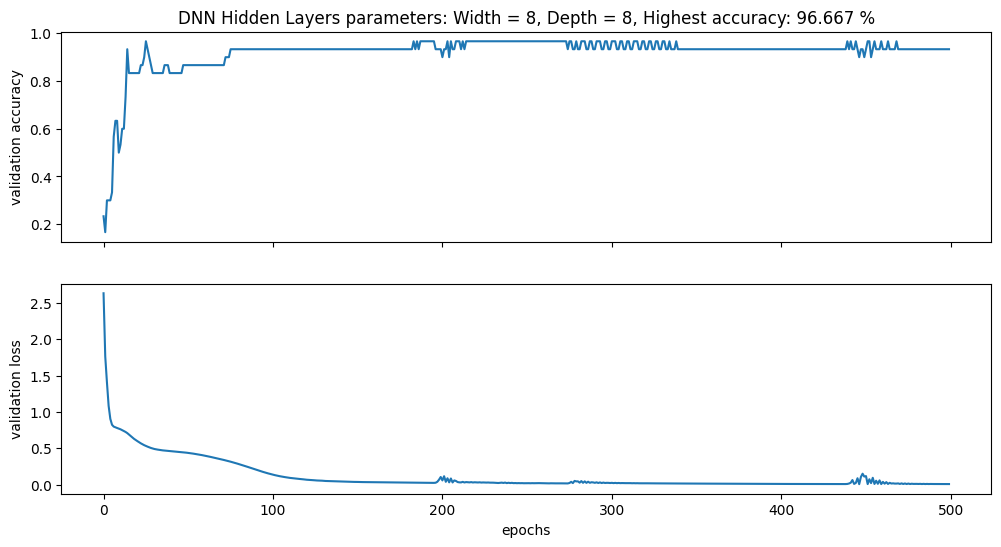

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax1.set_title("DNN Hidden Layers parameters: Width = {}, Depth = {}, Highest accuracy: {} %". format(width_value, depth_value, round(max(accuracy_list)*100,3)))
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

print(max(accuracy_list))